In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import bokeh

In [14]:
mu, sigma = 100, 50 # mean and standard deviation
p = np.random.normal(mu, sigma, 5000).tolist()
p = [int(i) for i in p]

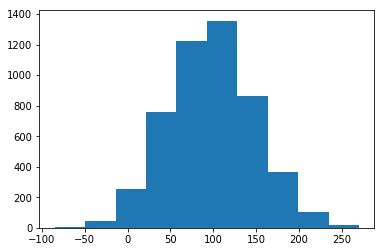

In [15]:
plt.hist(p);

In [16]:
def sample_mean(l):
    return sum(l)/len(l)

def find_biased_variance(l,mean):
    return sum([(i-mean)**2 for i in l])/len(l)

def find_unbiased_variance(l,mean):
    return sum([(i-mean)**2 for i in l])/(len(l)-1)

Population Mean: $$ \mu=\frac{ \sum_{i=1}^N x_{i}}{N} $$

Population Variance: $$ \sigma = \frac{\sum_{i=1}^N (x_{i}-\mu)^2}{N} $$

Sample Mean: $$ \bar x=\frac{\sum_{i=1}^n x_{i}}{n} $$

Unbiased Sample Variance: $$ \sigma =\frac{\sum_{i=1}^n-1 (x_{i}-\bar x)^2}{n-1} $$

In [17]:
def random_sample(l,n):
    random_list,index_list=[],[]
    for i in range(n):
        r = random.randint(0,len(l)-1)
        if r not in index_list:
            index_list.append(r)
            random_list.append(l[r])
        else:
            i-=1
    return random_list

population

In [18]:
mu = sample_mean(p)
pop_variance = find_biased_variance(p,mu)

sample

In [19]:
s = random_sample(p,10)
m = sample_mean(s)

In [30]:
plot_biased = []
biased_mean=[]
biased_variance=[]
r = range(2,10000)
for i in tqdm(r):
    s = random_sample(p,6)
    m = sample_mean(s)
    bv = find_biased_variance(s,m)
    biased_mean.append(m)
    biased_variance.append(bv)
    plot_biased.append(bv-pop_variance)

print('Biased Sample Variance Average (Diff): {}'.format(sum(plot_biased)/len(plot_biased)))

100%|██████████| 9998/9998 [00:00<00:00, 68423.18it/s]

Biased Sample Variance Average (Diff): -428.25701385519454


In [31]:
plot_unbiased = []
unbiased_mean=[]
unbiased_variance=[]
for i in tqdm(r):
    s = random_sample(p,10)
    m = sample_mean(s)
    uv = find_unbiased_variance(s,m)
    unbiased_variance.append(uv)
    unbiased_mean.append(m)
    plot_unbiased.append(uv-pop_variance)
print('Unbiased Sample Variance Average (Diff): {}'.format(sum(plot_unbiased)/len(plot_unbiased)))

100%|██████████| 9998/9998 [00:00<00:00, 49012.44it/s]

Unbiased Sample Variance Average (Diff): 13.62849169036962


In [32]:
visualize = pd.DataFrame([plot_biased,plot_unbiased]).T
visualize.columns = ['biased','unbiased']

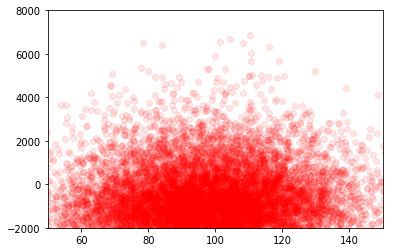

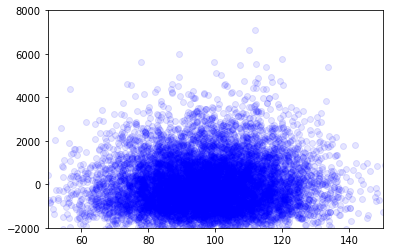

In [33]:
plt.scatter(biased_mean,plot_biased,color='r',alpha=.1)
plt.xlim(50,150)
plt.ylim(-2000,8000)
plt.show()
plt.scatter(unbiased_mean,plot_unbiased,color='b',alpha=.1)
plt.ylim(-2000,8000)
plt.xlim(50,150)
plt.show()

In [ ]:
plt.figure(figsize=(20,2))
sns.boxplot(visualize['biased'])
plt.xlim(-400,400)
plt.show()
plt.figure(figsize=(20,2))
sns.boxplot(visualize['unbiased'])
plt.xlim(-400,400)
plt.show()

In [ ]:
from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.io import output_notebook

output_notebook()

fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']

p = figure(x_range=fruits, plot_height=250, title="Fruit Counts",
           toolbar_location=None, tools="")

p.vbar(x=fruits, top=[5, 3, 4, 2, 4, 6], width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)